In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from google.colab import drive
import sklearn
from sklearn.impute import SimpleImputer

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path = "Path ที่นำทางไปสู่ไฟล์ Dataset ที่ต้องการ"
path = "/content/drive/MyDrive/train.csv"
train_data = pd.read_csv(path)
path = "/content/drive/MyDrive/test.csv"
x_test = pd.read_csv(path)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_data[["G_Passenger", 'N_Passenger']] = train_data["PassengerId"].str.split('_', expand=True).astype('int')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,G_Passenger,N_Passenger
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


In [ ]:
train_data.set_index('PassengerId',inplace=True)

In [ ]:
train_data['Cabin'] = train_data['Cabin'].fillna('T/0/P')

In [ ]:
train_data.isnull().sum() #บอกจำนวนค่าที่ NaN ของเเต่ละ Column

HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
G_Passenger       0
N_Passenger       0
dtype: int64

In [ ]:
train_data[['Deck','Num','Side']] = train_data.Cabin.str.split('/',expand=True)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,G_Passenger,N_Passenger,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S


In [ ]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

In [ ]:
train_data.drop(['Cabin', 'Name'], axis=1, inplace=True)

In [ ]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,G_Passenger,N_Passenger,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,F,1,S


In [ ]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

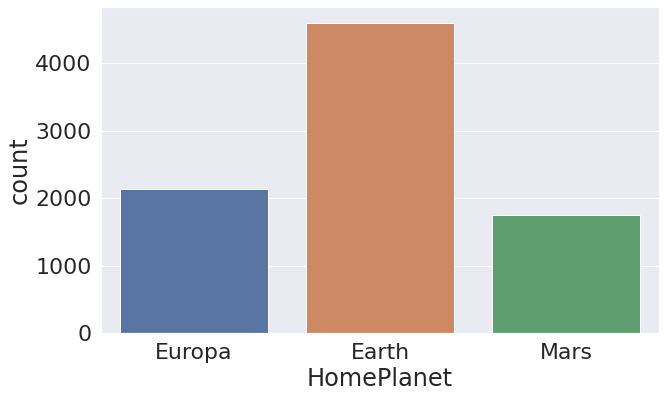

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="HomePlanet", data=train_data)

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(train_data[['HomePlanet']])

array([['Europa'],
       ['Earth'],
       ['Europa'],
       ...,
       ['Earth'],
       ['Europa'],
       ['Europa']], dtype=object)

In [ ]:
train_data['HomePlanet']=imp.fit_transform(train_data[['HomePlanet']])

In [ ]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

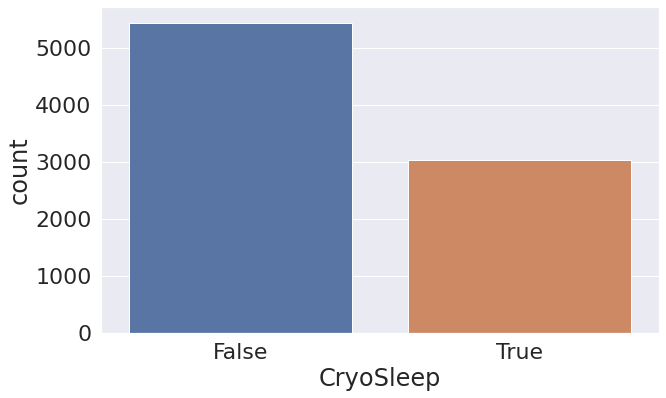

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x="CryoSleep", data=train_data)

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(train_data[['CryoSleep']])

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], dtype=object)

In [ ]:
train_data['CryoSleep']=imp.fit_transform(train_data[['CryoSleep']])

In [ ]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

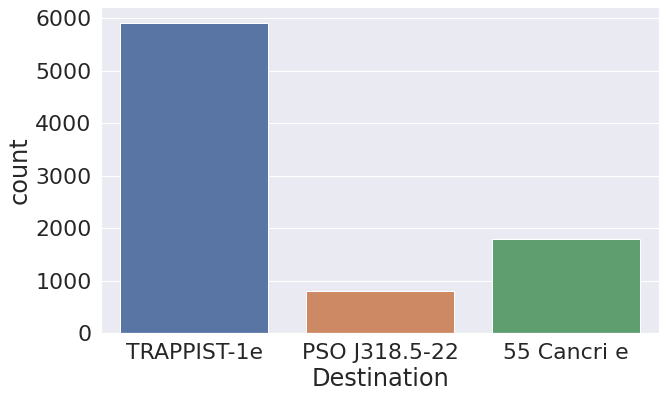

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x="Destination", data=train_data)

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(train_data[['Destination']])

array([['TRAPPIST-1e'],
       ['TRAPPIST-1e'],
       ['TRAPPIST-1e'],
       ...,
       ['TRAPPIST-1e'],
       ['55 Cancri e'],
       ['TRAPPIST-1e']], dtype=object)

In [ ]:
train_data['Destination']=imp.fit_transform(train_data[['Destination']])

In [ ]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

Text(0.5, 0, 'Age (years)')

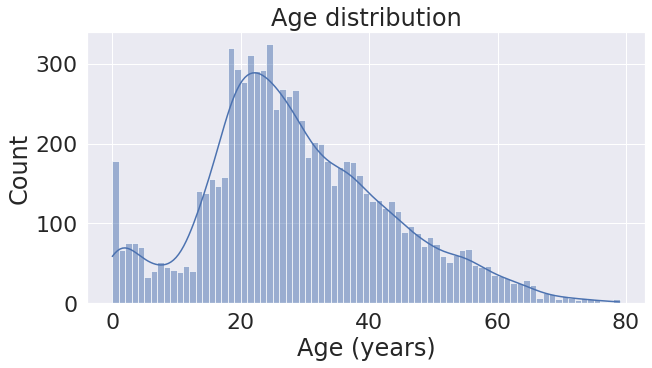

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_data, x='Age', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

In [ ]:
Age_Stat = {}
Age_Stat['Mean'] = train_data['Age'].mean()
Age_Stat['Median'] = train_data['Age'].median()
Age_Stat['Mode'] = train_data['Age'].mode()[0]
Age_Stat

{'Mean': 28.82793046746535, 'Median': 27.0, 'Mode': 24.0}

In [ ]:
imp = SimpleImputer(strategy="median")
imp.fit_transform(train_data[['Age']])

array([[39.],
       [24.],
       [58.],
       ...,
       [26.],
       [32.],
       [44.]])

In [ ]:
train_data['Age']=imp.fit_transform(train_data[['Age']])

In [ ]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

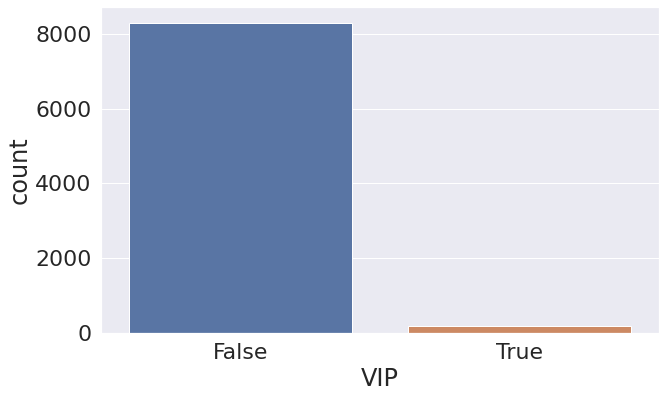

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="VIP", data=train_data)

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(train_data[['VIP']])

array([[False],
       [False],
       [True],
       ...,
       [False],
       [False],
       [False]], dtype=object)

In [ ]:
train_data['VIP']=imp.fit_transform(train_data[['VIP']])

In [ ]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

In [ ]:
imp = SimpleImputer(strategy='constant', fill_value=0)
train_data['RoomService']=imp.fit_transform(train_data[['RoomService']])
imp = SimpleImputer(strategy='constant', fill_value=0)
train_data['FoodCourt']=imp.fit_transform(train_data[['FoodCourt']])
imp = SimpleImputer(strategy='constant', fill_value=0)
train_data['ShoppingMall']=imp.fit_transform(train_data[['ShoppingMall']])
imp = SimpleImputer(strategy='constant', fill_value=0)
train_data['Spa']=imp.fit_transform(train_data[['Spa']])
imp = SimpleImputer(strategy='constant', fill_value=0)
train_data['VRDeck']=imp.fit_transform(train_data[['VRDeck']])

In [ ]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
dtype: int64

In [ ]:
train_data['total_spent']= train_data['RoomService']+ train_data['FoodCourt']+ train_data['ShoppingMall']+ train_data['Spa']+ train_data['VRDeck']

In [ ]:
train_data.isnull().sum() #บอกจำนวนค่าที่ NaN ของเเต่ละ Column

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
total_spent     0
dtype: int64

In [ ]:
train_data['AgeGroup'] = pd.cut(train_data.Age,bins=[0, 5, 12, 18, 50, 150], labels=['Baby','Child','Teen', 'Adult','Elderly'])
train_data['AgeGroup']

PassengerId
0001_01      Adult
0002_01      Adult
0003_01    Elderly
0003_02      Adult
0004_01       Teen
            ...   
9276_01      Adult
9278_01       Teen
9279_01      Adult
9280_01      Adult
9280_02      Adult
Name: AgeGroup, Length: 8693, dtype: category
Categories (5, object): ['Baby' < 'Child' < 'Teen' < 'Adult' < 'Elderly']

In [ ]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
total_spent       0
AgeGroup        178
dtype: int64

In [ ]:
imp = SimpleImputer(strategy='constant', fill_value='Baby')
train_data['AgeGroup']=imp.fit_transform(train_data[['AgeGroup']])

In [ ]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
total_spent     0
AgeGroup        0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  G_Passenger   8693 non-null   int64  
 12  N_Passenger   8693 non-null   int64  
 13  Deck          8693 non-null   object 
 14  Num           8693 non-null   object 
 15  Side          8693 non-null   object 
 16  total_spent   8693 non-null   float64
 17  AgeGroup      8693 non-null   object 
dtypes: bool(1), float64(7), 

In [ ]:
categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num','AgeGroup']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate([train_data[i]], axis=0).astype(str)
    le.fit(arr)
    train_data[i]=le.transform(train_data[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num
AgeGroup


In [ ]:
train_data['Transported']=train_data['Transported'].replace({True:1,False:0})

In [ ]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,G_Passenger,N_Passenger,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0,0.0,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,1,5,0,1,736.0,0
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3,1,0,0,1,10383.0,3
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,0,0,1,5176.0,0
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,4,1,5,1,1,1091.0,4


In [ ]:
x = train_data.drop('Transported',axis=1)
y = train_data['Transported']

In [ ]:
x.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'G_Passenger',
       'N_Passenger', 'Deck', 'Num', 'Side', 'total_spent', 'AgeGroup'],
      dtype='object')

In [ ]:
model=CatBoostClassifier(iterations=3000,
                         eval_metric='Accuracy',
                        verbose=0)

In [ ]:
model.fit(x,y)

In [ ]:
pred=model.predict(x)
    
print(accuracy_score(y.values,pred))

0.8904865984125158


In [ ]:
x_test[["G_Passenger", 'N_Passenger']] = x_test["PassengerId"].str.split('_', expand=True).astype('int')
x_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,G_Passenger,N_Passenger
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1


In [ ]:
x_test.set_index('PassengerId',inplace=True)

In [ ]:
x_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
G_Passenger       0
N_Passenger       0
dtype: int64

In [ ]:
x_test['Cabin'] = x_test['Cabin'].fillna('T/0/P')

In [ ]:
x_test[['Deck','Num','Side']] = x_test.Cabin.str.split('/',expand=True)
x_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,G_Passenger,N_Passenger,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1,G,3,S
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1,F,4,S
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1,C,0,S
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1,C,1,S
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1,F,5,S


In [ ]:
x_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin             0
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

In [ ]:
x_test.drop(['Cabin', 'Name'], axis=1, inplace=True)

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(x_test[['HomePlanet']])

array([['Earth'],
       ['Earth'],
       ['Europa'],
       ...,
       ['Mars'],
       ['Europa'],
       ['Earth']], dtype=object)

In [ ]:
x_test['HomePlanet']=imp.fit_transform(x_test[['HomePlanet']])

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(x_test[['CryoSleep']])

array([[True],
       [False],
       [True],
       ...,
       [True],
       [False],
       [True]], dtype=object)

In [ ]:
x_test['CryoSleep']=imp.fit_transform(x_test[['CryoSleep']])

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(x_test[['Destination']])

array([['TRAPPIST-1e'],
       ['TRAPPIST-1e'],
       ['55 Cancri e'],
       ...,
       ['55 Cancri e'],
       ['TRAPPIST-1e'],
       ['PSO J318.5-22']], dtype=object)

In [ ]:
x_test['Destination']=imp.fit_transform(x_test[['Destination']])

In [ ]:
x_test.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

In [ ]:
Age_Stat = {}
Age_Stat['Mean'] = x_test['Age'].mean()
Age_Stat['Median'] = x_test['Age'].median()
Age_Stat['Mode'] = x_test['Age'].mode()[0]
Age_Stat

{'Mean': 28.65814620162446, 'Median': 26.0, 'Mode': 18.0}

In [ ]:
imp = SimpleImputer(strategy="median")
imp.fit_transform(x_test[['Age']])

array([[27.],
       [19.],
       [31.],
       ...,
       [26.],
       [26.],
       [43.]])

In [ ]:
x_test['Age']=imp.fit_transform(x_test[['Age']])

In [ ]:
x_test.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
G_Passenger       0
N_Passenger       0
Deck              0
Num               0
Side              0
dtype: int64

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(x_test[['VIP']])

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], dtype=object)

In [ ]:
x_test['VIP']=imp.fit_transform(x_test[['VIP']])

In [ ]:
imp = SimpleImputer(strategy='constant', fill_value=0)
x_test['RoomService']=imp.fit_transform(x_test[['RoomService']])
imp = SimpleImputer(strategy='constant', fill_value=0)
x_test['FoodCourt']=imp.fit_transform(x_test[['FoodCourt']])
imp = SimpleImputer(strategy='constant', fill_value=0)
x_test['ShoppingMall']=imp.fit_transform(x_test[['ShoppingMall']])
imp = SimpleImputer(strategy='constant', fill_value=0)
x_test['Spa']=imp.fit_transform(x_test[['Spa']])
imp = SimpleImputer(strategy='constant', fill_value=0)
x_test['VRDeck']=imp.fit_transform(x_test[['VRDeck']])


In [ ]:
x_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
dtype: int64

In [ ]:
x_test['total_spent']= x_test['RoomService']+ x_test['FoodCourt']+ x_test['ShoppingMall']+ x_test['Spa']+ x_test['VRDeck']

In [ ]:
x_test['AgeGroup'] = pd.cut(x_test.Age,bins=[0, 5, 12, 18, 50, 150], labels=['Baby','Child','Teen', 'Adult','Elderly'])

In [ ]:
x_test.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
G_Passenger      0
N_Passenger      0
Deck             0
Num              0
Side             0
total_spent      0
AgeGroup        82
dtype: int64

In [ ]:
imp = SimpleImputer(strategy='constant', fill_value='Baby')
x_test['AgeGroup']=imp.fit_transform(x_test[['AgeGroup']])

In [ ]:
x_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
total_spent     0
AgeGroup        0
dtype: int64

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  G_Passenger   4277 non-null   int64  
 11  N_Passenger   4277 non-null   int64  
 12  Deck          4277 non-null   object 
 13  Num           4277 non-null   object 
 14  Side          4277 non-null   object 
 15  total_spent   4277 non-null   float64
 16  AgeGroup      4277 non-null   object 
dtypes: float64(7), int64(2), object(8)
memory usage: 601.5+ KB


In [ ]:
categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num','AgeGroup']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate([x_test[i]], axis=0).astype(str)
    le.fit(arr)
    x_test[i]=le.transform(x_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num
AgeGroup


In [ ]:
x_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,G_Passenger,N_Passenger,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,
0013_01,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,13,1,6,820,1,0.0,0
0018_01,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,1,5,927,1,2832.0,0
0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,2,0,1,0.0,0
0021_01,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,2,1,1,7418.0,0
0023_01,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,23,1,5,1029,1,645.0,0


In [ ]:
y_pred = model.predict(x_test)
sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=x_test.index)
sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [ ]:
path = "/content/drive/MyDrive/sample_submission.csv"
submission = pd.read_csv(path)
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
submission["Transported"] = y_pred
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,1
4274,9271_01,1
4275,9273_01,1


In [ ]:
y_pred = model.predict(x_test)

submission=pd.DataFrame({'Transported':y_pred.astype(bool)},index=x_test.index)

submission

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
...,...
9266_02,True
9269_01,True
9271_01,True


In [ ]:
submission.reset_index()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [ ]:
submission.to_csv('MED_T0P_BABY_IRT3000.csv', index=True)